# **1.Defining Problem Statement and Analyzing basic metrics. (10 Points)**

Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary.

Non-Graphical Analysis: Value counts and unique attributes.
​

Visual Analysis - Univariate & Bivariate.

*  For continuous variable(s): Distplot, countplot, histogram for univariate analysis.

*  For categorical variable(s): Boxplot.

*  For correlation: Heatmaps, Pairplots.

##  What is Walmart?

`Walmart`, founded in `1962 by Sam Walton`, is a retail giant and one of the world's largest and most influential companies. Headquartered in `Bentonville, Arkansas`, this American multinational corporation has established itself as a global powerhouse in the retail industry. Walmart operates a vast network of hypermarkets, discount department stores, and grocery stores under various brand names across the United States and in numerous countries around the world.

Known for its `"Everyday Low Prices"` strategy, Walmart has redefined the retail landscape with its commitment to offering a wide range of products at affordable prices. With its extensive supply chain and efficient distribution systems, the company has played a pivotal role in shaping consumer expectations and shopping habits. Beyond retail, Walmart has also ventured into e-commerce, technology innovation, and sustainability initiatives, further solidifying its position as a key player in the modern retail ecosystem.



##  Objective

The objective of this project is to conduct a comprehensive analysis of customer purchase behavior, with a specific focus on purchase amounts, in relation to customer gender during the Black Friday sales event at Walmart Inc. This study aims to provide valuable insights that can assist the management team at Walmart Inc. in making data-driven decisions.


##  About Data

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday.It has information of about 0.5 Million transactions during Black Friday throughout various years.

## Features of the dataset:


| Feature | Description |
|:--------|:------------|
| User_ID | User ID of the Customer |
| Product ID | Product ID of the Purchased Product |
| Gender | Gender of the Customer (Male/Female) |
| Age | Age of the Customer (in bins) |
| Occupation | Occupation of the Customer (Masked) |
| City_Category | Category of the City (A,B,C) |
| StayInCurrentCityYears | 	Number of years stay in current city |
| Marital_Status | Marital Status (0 - Unmarried / 1 - Married) |
| ProductCategory | Product Category (Masked) |
| Purchase | Purchase Amount |

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')
import copy

In [ ]:
# loading the dataset
df = pd.read_csv('walmart_data.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.info()

## 🔁 Changing the Datatype of Columns


In [ ]:
for i in df.columns[:-1]:
    df[i] = df[i].astype('category')

df.info()

## 📝 Statistical Summary

### Satistical summary of object type columns

In [ ]:
df.describe(include = 'category')

In [ ]:
df.describe()

## 👥 Duplicate Detection

In [ ]:
df.duplicated().value_counts()

In [ ]:
# checking the unique values for columns
for i in df.columns:
    print('Unique Values in',i,'column are :-')
    print(df[i].unique())
    print('-'*70)

In [ ]:
#replacing the values in marital_status column

df['Marital_Status'] = df['Marital_Status'].replace({0:'Unmarried',1:'Married'})
df['Marital_Status'].unique()

# 1.1.Univariate Analysis

## 1.1 Numerical Variables

### 1.1.1 Purchase Amount Distribution

In [ ]:
import matplotlib.pyplot as plt

# Setting up the figure with appropriate grid layout proportions
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0.4)

# Creating histogram for purchase amount
ax0 = fig.add_subplot(gs[0, 0])
ax0.hist(df['Purchase'], color='#4E79A7', edgecolor='black', bins=20)  # Updated color
ax0.set_title('Purchase Amount Distribution', fontsize=15, fontweight='bold', fontfamily='serif')
ax0.set_xlabel('Purchase Amount', fontsize=12, fontweight='bold')
ax0.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

# Creating box plot for purchase amount
ax1 = fig.add_subplot(gs[1, 0])
boxplot = ax1.boxplot(df['Purchase'], vert=False, patch_artist=True, widths=0.5)

# Customizing boxplot
boxplot['boxes'][0].set_facecolor('#F28E2B')  # Updated box color
boxplot['medians'][0].set_color('#E15759')  # Updated median line color
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor="#76B7B2")  # Updated outlier color

# Annotating 5-point summary
summary_stats = {
    'min': df['Purchase'].min(),
    'Q1': df['Purchase'].quantile(0.25),
    'median': df['Purchase'].median(),
    'Q3': df['Purchase'].quantile(0.75),
    'max': df['Purchase'].max()
}

for stat, value in summary_stats.items():
    ax1.annotate(
        f"{value:.1f}",
        xy=(value, 1),
        xytext=(value + 500, 1.1),
        fontsize=10,
        arrowprops=dict(arrowstyle="<-", lw=1, connectionstyle="arc3,rad=0.2")
    )

# Cleaning up boxplot appearance
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_yticks([])
ax1.set_xlabel('Purchase Amount', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


#### Calculating the Number of Outliers

- As seen above, Purchase amount over 21399 is considered as outlier. We will count the number of outliers as below

In [ ]:
len(df.loc[df['Purchase'] > 21399,'Purchase'])

## 1.2 Categorical Variables

###  1.2.1 🙎🏻‍♀️🙎🏻‍♂️ Gender, 👩🏻‍🤝‍🧑🏻Marital Status  and 🌍City Category Distribution

In [ ]:
#setting the plot style
fig = plt.figure(figsize = (15,12))
gs = fig.add_gridspec(1,3)

                                        # creating pie chart for gender disribution
ax0 = fig.add_subplot(gs[0,0])

color_map = ["#4E79A7", "#4b4b4c"]
ax0.pie(df['Gender'].value_counts().values,labels = df['Gender'].value_counts().index,autopct = '%.1f%%',
        shadow = True,colors = color_map,textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax0.set_title('Gender Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating pie chart for marital status
ax1 = fig.add_subplot(gs[0,1])

color_map = ["#4E79A7", "#4b4b4c"]
ax1.pie(df['Marital_Status'].value_counts().values,labels = df['Marital_Status'].value_counts().index,autopct = '%.1f%%',
        shadow = True,colors = color_map,textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax1.set_title('Marital Status Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating pie chart for city category
ax1 = fig.add_subplot(gs[0,2])

color_map = ["#4E79A7", "#4b4b4c",'#99AEBB']
ax1.pie(df['City_Category'].value_counts().values,labels = df['City_Category'].value_counts().index,autopct = '%.1f%%',
        shadow = True,colors = color_map,textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax1.set_title('City Category Distribution',{'font':'serif', 'size':15,'weight':'bold'})
plt.show()

### 1.2.2 📆 Customer Age Distribution

In [ ]:
#setting the plot style
fig = plt.figure(figsize = (15,7))
gs = fig.add_gridspec(1,2,width_ratios=[0.6, 0.4])

                                        # creating bar chart for age disribution

ax0 = fig.add_subplot(gs[0,0])
temp = df['Age'].value_counts()
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']
ax0.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2)

#adding the value_counts
for i in temp.index:
    ax0.text(i,temp[i]+5000,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')

#adding grid lines
ax0.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)

#adding axis label
ax0.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax0.set_xlabel('Age Group',fontweight = 'bold',fontsize = 12)
ax0.set_xticklabels(temp.index,fontweight = 'bold')



                                        #creating a info table for age

ax1 = fig.add_subplot(gs[0,1])
age_info = age_info = [['26-35','40%'],['36-45','20%'],['18-25','18%'],['46-50','8%'],['51-55','7%'],['55+','4%'],
                       ['0-17','3%']]
color_2d = [["#3A7089",'#FFFFFF'],["#4b4b4c",'#FFFFFF'],['#99AEBB','#FFFFFF'],['#5C8374','#FFFFFF'],['#6F7597','#FFFFFF'],
            ['#7A9D54','#FFFFFF'],['#9EB384','#FFFFFF']]

table = ax1.table(cellText = age_info, cellColours=color_2d, cellLoc='center',colLabels =['Age Group','Percent Dist.'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(15)

#removing axis
ax1.axis('off')

#setting title for visual
fig.suptitle('Customer Age Distribution',font = 'serif', size = 18, weight = 'bold')

plt.show()

### 1.2.3 🌆 Customer Stay In current City Distribution

In [ ]:
#setting the plot style
fig = plt.figure(figsize = (15,7))
gs = fig.add_gridspec(1,2,width_ratios=[0.6, 0.4])

                            # creating bar chart for Customer Stay In current City

ax1 = fig.add_subplot(gs[0,0])
temp = df['Stay_In_Current_City_Years'].value_counts()
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597']
ax1.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2,width = 0.6)

#adding the value_counts
for i in temp.index:
    ax1.text(i,temp[i]+4000,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')

#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding axis label
ax1.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax1.set_xlabel('Stay in Years',fontweight = 'bold',fontsize = 12)
ax1.set_xticklabels(temp.index,fontweight = 'bold')



                                        #creating a info table for Customer Stay In current City

ax2 = fig.add_subplot(gs[0,1])
stay_info = [['1','35%'],['2','19%'],['3','17%'],['4+','15%'],['0','14%']]
color_2d = [["#3A7089",'#FFFFFF'],["#4b4b4c",'#FFFFFF'],['#99AEBB','#FFFFFF'],['#5C8374','#FFFFFF'],['#6F7597','#FFFFFF']]

table = ax2.table(cellText = stay_info, cellColours=color_2d, cellLoc='center',colLabels =['Stay in Years','Percent Dist.'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(15)

#removing axis
ax2.axis('off')

#setting title for visual
fig.suptitle('Customer Current City Stay Distribution',font = 'serif', size = 18, weight = 'bold')

plt.show()

### 1.2.4 🛒 Top 10 Products and Categories: Sales Snapshot

- **`Top 10 Products and Product Categories`** which has sold most during Black Friday Sales

In [ ]:
#setting the plot style
fig = plt.figure(figsize = (15,6))
gs = fig.add_gridspec(1,2)

                                        #Top 10 Product_ID Sales

ax = fig.add_subplot(gs[0,0])

temp = df['Product_ID'].value_counts()[0:10]

# reversing the list
temp = temp.iloc[-1:-11:-1]

color_map =  ['#99AEBB' for i in range(7)] + ["#3A7089" for i in range(3)]
#creating the plot
ax.barh(y = temp.index,width = temp.values,height = 0.2,color = color_map)
ax.scatter(y = temp.index, x = temp.values, s = 150 , color = color_map )

#removing x-axis
ax.set_xticks([])

#adding label to each bar
for y,x in zip(temp.index,temp.values):
    ax.text( x + 50 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')

#removing the axis lines
for s in ['top','bottom','right']:
    ax.spines[s].set_visible(False)

#adding axis labels
ax.set_xlabel('Units Sold',{'font':'serif', 'size':10,'weight':'bold'})
ax.set_ylabel('Product ID',{'font':'serif', 'size':12,'weight':'bold'})

#creating the title
ax.set_title('Top 10 Product_ID with Maximum Sales',
            {'font':'serif', 'size':15,'weight':'bold'})


                                        #Top 10 Product Category Sales
ax = fig.add_subplot(gs[0,1])

temp = df['Product_Category'].value_counts()[0:10]

# reversing the list
temp = temp.iloc[-1:-11:-1]

#creating the plot
ax.barh(y = temp.index,width = temp.values,height = 0.2,color = color_map)
ax.scatter(y = temp.index, x = temp.values, s = 150 , color = color_map )

#removing x-axis
ax.set_xticks([])

#adding label to each bar
for y,x in zip(temp.index,temp.values):
    ax.text( x + 5000 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')

#removing the axis lines
for s in ['top','bottom','right']:
    ax.spines[s].set_visible(False)

#adding axis labels
ax.set_xlabel('Units Sold',{'font':'serif', 'size':12,'weight':'bold'})
ax.set_ylabel('Product Category',{'font':'serif', 'size':12,'weight':'bold'})

#creating the title
ax.set_title('Top 10 Product Category with Maximum Sales',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

### 1.2.5 👷🏻‍♂️👷🏻‍♀️ Top 10 Customer Occupation

- **`Top 10 Occupation of Customer `** in Black Friday Sales

In [ ]:
temp = df['Occupation'].value_counts()[0:10]

#setting the plot style
fig,ax = plt.subplots(figsize = (13,6))

color_map =  ["#3A7089" for i in range(3)] +  ['#99AEBB' for i in range(7)]

#creating the plot
ax.bar(temp.index,temp.values,color = color_map,zorder = 2)

#adding valuecounts
for x,y in zip(temp.index,temp.values):
    ax.text(x, y + 2000, y,{'font':'serif', 'size':10,'weight':'bold'},va='center',ha = 'center')

#setting grid style
ax.grid(color = 'black',linestyle = '--',axis = 'y',zorder = 0,dashes = (5,10))

#customizing the axis labels
ax.set_xticklabels(temp.index,fontweight = 'bold',fontfamily='serif')
ax.set_xlabel('Occupation Category',{'font':'serif', 'size':12,'weight':'bold'})
ax.set_ylabel('Count',{'font':'serif', 'size':12,'weight':'bold'})

#removing the axis lines

for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

#adding title to the visual
ax.set_title('Top 10 Occupation of Customers',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

# 1.3.Bivariate Analysis

## 1.3.1 📊 Exploring Purchase Patterns

- Boxplots of Purchase Amount Across various Variables

In [ ]:
#setting the plot style
fig = plt.figure(figsize = (15,20))
gs = fig.add_gridspec(3,2)

for i,j,k in [(0,0,'Gender'),(0,1,'City_Category'),(1,0,'Marital_Status'),(1,1,'Stay_In_Current_City_Years'),(2,1,'Age')]:

    #plot position
    if i <= 1:
        ax0 = fig.add_subplot(gs[i,j])
    else:
        ax0 = fig.add_subplot(gs[i,:])

    #plot
    color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']
    sns.boxplot(data = df, x = k, y  = 'Purchase' ,ax = ax0,width = 0.5, palette =color_map)

    #plot title
    ax0.set_title(f'Purchase Amount Vs {k}',{'font':'serif', 'size':12,'weight':'bold'})

    #customizing axis
    ax0.set_xticklabels(df[k].unique(),fontweight = 'bold',fontsize = 12)
    ax0.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
    ax0.set_xlabel('')


plt.show()

# 1.3.2 🙎🏻‍♂️🙎🏻‍♀️ Gender VS 💰 Purchase Amount

In [ ]:
#creating a df for purchase amount vs gender
temp = df.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

#renaming the gender
temp['Gender'] = temp['Gender'].replace({'F':'Female','M':'Male'})

temp

In [ ]:
#setting the plot style
fig = plt.figure(figsize = (15,14))
gs = fig.add_gridspec(3,2,height_ratios =[0.10,0.4,0.5])


                                        #Distribution of Purchase Amount
ax = fig.add_subplot(gs[0,:])

#plotting the visual
ax.barh(temp.loc[0,'Gender'],width = temp.loc[0,'%sum'],color = "#3A7089",label = 'Female')
ax.barh(temp.loc[0,'Gender'],width = temp.loc[1,'%sum'],left =temp.loc[0,'%sum'], color =  "#4b4b4c",label = 'Male' )

#inserting the text
txt = [0.0] #for left parameter in ax.text()

for i in temp.index:
    #for amount
    ax.text(temp.loc[i,'%sum']/2 + txt[0],0.15,f"${temp.loc[i,'sum_in_billions']} Billion",
           va = 'center', ha='center',fontsize=18, color='white')

    #for gender
    ax.text(temp.loc[i,'%sum']/2 + txt[0],- 0.20 ,f"{temp.loc[i,'Gender']}",
           va = 'center', ha='center',fontsize=14, color='white')

    txt += temp.loc[i,'%sum']

#removing the axis lines
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

#customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0,1)

#plot title
ax.set_title('Gender-Based Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                            #Distribution of Purchase Amount per Transaction

ax1 = fig.add_subplot(gs[1,0])

color_map = ["#3A7089", "#4b4b4c"]

#plotting the visual
ax1.bar(temp['Gender'],temp['per_purchase'],color = color_map,zorder = 2,width = 0.3)

#adding average transaction line
avg = round(df['Purchase'].mean())

ax1.axhline(y = avg, color ='red', zorder = 0,linestyle = '--')

#adding text for the line
ax1.text(0.4,avg + 300, f"Avg. Transaction Amount ${avg:.0f}",
         {'font':'serif','size' : 12},ha = 'center',va = 'center')

#adjusting the ylimits
ax1.set_ylim(0,11000)

#adding the value_counts
for i in temp.index:
    ax1.text(temp.loc[i,'Gender'],temp.loc[i,'per_purchase']/2,f"${temp.loc[i,'per_purchase']:.0f}",
             {'font':'serif','size' : 12,'color':'white','weight':'bold' },ha = 'center',va = 'center')

#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding axis label
ax1.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax1.set_xticklabels(temp['Gender'],fontweight = 'bold',fontsize = 12)

#setting title for visual
ax1.set_title('Average Purchase Amount per Transaction',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating pie chart for gender disribution
ax2 = fig.add_subplot(gs[1,1])

color_map = ["#3A7089", "#4E79A7"]
ax2.pie(temp['count'],labels = temp['Gender'],autopct = '%.1f%%',
        shadow = True,colors = color_map,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax2.set_title('Gender-Based Transaction Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating kdeplot for purchase amount distribution

ax3 = fig.add_subplot(gs[2,:])

#plotting the kdeplot
sns.kdeplot(data = df, x = 'Purchase', hue = 'Gender', palette = color_map,fill = True, alpha = 1,ax = ax3)

#removing the axis lines
for s in ['top','left','right']:
    ax3.spines[s].set_visible(False)

# adjusting axis labels
ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax3.set_title('Purchase Amount Distribution by Gender',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()


# **1.4.For correlation: Heatmaps, Pairplots**

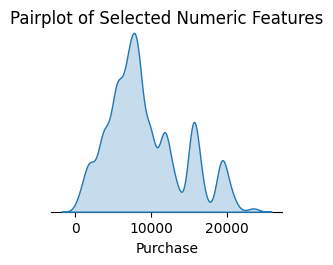

In [ ]:
# Pairplot for selected numeric columns
selected_columns = ['Occupation', 'Marital_Status', 'Product_Category', 'Purchase']
sns.pairplot(df[selected_columns], diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Selected Numeric Features", y=1.02)
plt.show()

# **2.Missing Value & Outlier Detection (10 Points)**

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Creating a summary of missing values
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_summary


,Missing Values,Percentage (%)
Occupation,1,0.00409
City_Category,1,0.00409
Product_Category,1,0.00409
Purchase,1,0.00409
Marital_Status,1,0.00409
Stay_In_Current_City_Years,1,0.00409
Product_ID,0,0.00000
User_ID,0,0.00000
Gender,0,0.00000
Age,0,0.00000


Column: Purchase
Number of Outliers: 115
Lower Bound: -3399.75, Upper Bound: 21250.25
----------------------------------------


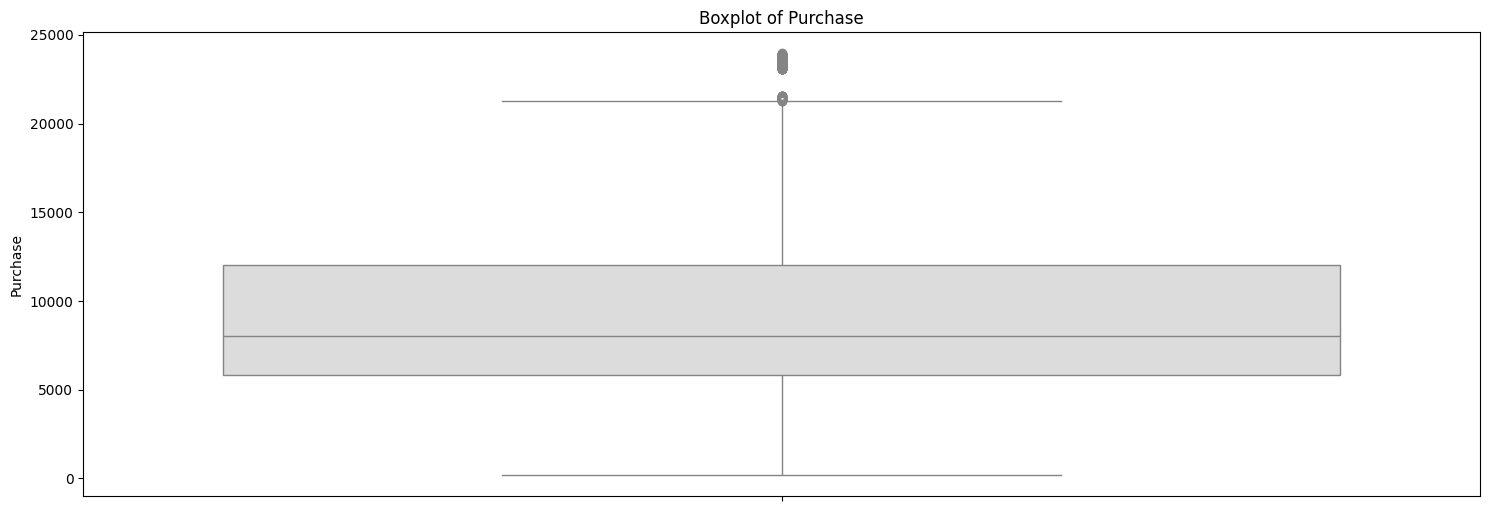

In [ ]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# IQR outlier detection
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Column: {column}")
    print(f"Number of Outliers: {len(outliers)}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print("-" * 40)

# Boxplot visualization
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, len(numeric_columns)//2 + 1, i)
    sns.boxplot(data=df, y=column, palette="coolwarm")
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

# **3.Business Insights based on Non- Graphical and Visual Analysis.(10 Points)**

Comments on the range of attributes.

Comments on the distribution of the variables and relationship between them.

Comments for each univariate and bivariate plot.

# **Comments on the Range of Attributes**

**Numeric Columns:**
Occupation: Values range from the minimum occupation category to the maximum, reflecting diverse job roles.

**Marital_Status:** Binary variable (0 or 1), indicating unmarried or married status.

**Product_Category:** Indicates different product types, and its range highlights the variety of products.

**Purchase:** Represents the purchase amount; its range will show variability in spending habits.

**Categorical Columns:**
Gender, Age, City_Category, Stay_In_Current_City_Years: These provide demographic and behavioral attributes that influence purchasing decisions.
Insight: Attributes like Age, Gender, and City_Category can segment customers for targeted marketing campaigns, while the Purchase column reflects consumer spending behavior.

# **Comments on the Distribution of Variables**

**Univariate Analysis:**

**Occupation:**
 Skewed distribution indicates dominant job roles in the dataset.

**Purchase:** Likely to have a right-skewed distribution, reflecting that a smaller proportion of customers make large purchases.

**Product_Category:** Uneven distribution, with a few categories being more popular.

**Bivariate Analysis:**

**Gender and Purchase:** Identifies if purchasing trends vary significantly between males and females.

**Age and Purchase:** Analyzes how spending changes with age.

**City_Category and Purchase:** Explores how urbanization level affects spending.

**Insight:** Outliers or skewed distributions in Purchase may indicate high-value customers or unique shopping behavior, requiring tailored strategies.


# **Comments on Univariate Plots**

**Boxplots:**
Outliers in Purchase suggest the presence of high-spending customers. These could be valuable for loyalty programs.

**Histograms:**
Distribution of Product_Category shows which products are most popular, guiding inventory management.

**Insight:** Identifying popular products and customer spending behaviors enables focused sales and promotional strategies.

# **Comments on Bivariate Plots**
**Scatterplots:**
Relationships between Age and Purchase or Gender and Purchase highlight demographic preferences.

**Pairplots:**
Interplay among numeric attributes like Occupation, Marital_Status, and Purchase can uncover patterns like which jobs or marital statuses correlate with higher spending.

**Insight:** Understanding these relationships enables businesses to align products and services with the preferences of specific customer groups.


# **4.Answering questions (50 Points)**
1. Are women spending more money per transaction than men? Why or Why not? (10
Points)

2. Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)

3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)

4. Results when the same activity is performed for Married vs Unmarried (10 Points)

5. Results when the same activity is performed for Age (10 Points)




## 4 Confidence Interval Construction: Estimating Average Purchase Amount per Transaction

**1. Step 1 - Building CLT Curve**
- As seen above, the purchase amount distribution is not Normal. So we need to use `Central Limit Theorem`. It states the distribution of sample means will approximate a normal distribution, regardless of the underlying population distribution

**2. Step 2 - Building Confidence Interval**
- After building CLT curve, we will create a confidence interval predicting population mean at `99%,95% and 90% Confidence level`.
    
**Note** -  We will use different sample sizes of [100,1000,5000,50000]

In [ ]:
#creating a function to calculate confidence interval

def confidence_interval(data,ci):
    #converting the list to series
    l_ci = (100-ci)/2
    u_ci = (100+ci)/2

    #calculating lower limit and upper limit of confidence interval
    interval = np.percentile(data,[l_ci,u_ci]).round(0)

    return interval

In [ ]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    #creating separate data frames for each gender
    df_male = df.loc[df['Gender'] == 'M','Purchase']
    df_female = df.loc[df['Gender'] == 'F','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0),(50000,1,1)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    male_samples = {}
    female_samples = {}

    for i,x,y in sample_sizes:
        male_means = [] #list for collecting the means of male sample
        female_means = [] #list for collecting the means of female sample

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            male_bootstrapped_samples = np.random.choice(df_male,size = i)
            female_bootstrapped_samples = np.random.choice(df_female,size = i)

            #calculating mean of those samples
            male_sample_mean = np.mean(male_bootstrapped_samples)
            female_sample_mean = np.mean(female_bootstrapped_samples)

            #appending the mean to the list
            male_means.append(male_sample_mean)
            female_means.append(female_sample_mean)

        #storing the above sample generated
        male_samples[f'{ci}%_{i}'] = male_means
        female_samples[f'{ci}%_{i}'] = female_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'male_means':male_means,'female_means':female_means})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x,y])

        #plots for male and female
        sns.kdeplot(data = temp_df,x = 'male_means',color ="#3A7089" ,fill = True, alpha = 0.5,ax = ax,label = 'Male')
        sns.kdeplot(data = temp_df,x = 'female_means',color ="#4E79A7" ,fill = True, alpha = 0.5,ax = ax,label = 'Female')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(male_means,ci)
        f_range = confidence_interval(female_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#3A7089",linestyle = '--')

        for k in f_range:
            ax.axvline(x = k,ymax = 0.9, color ="#4E79A7",linestyle = '--')


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return male_samples,female_samples

In [ ]:
m_samp_90,f_samp_90 = plot(90)

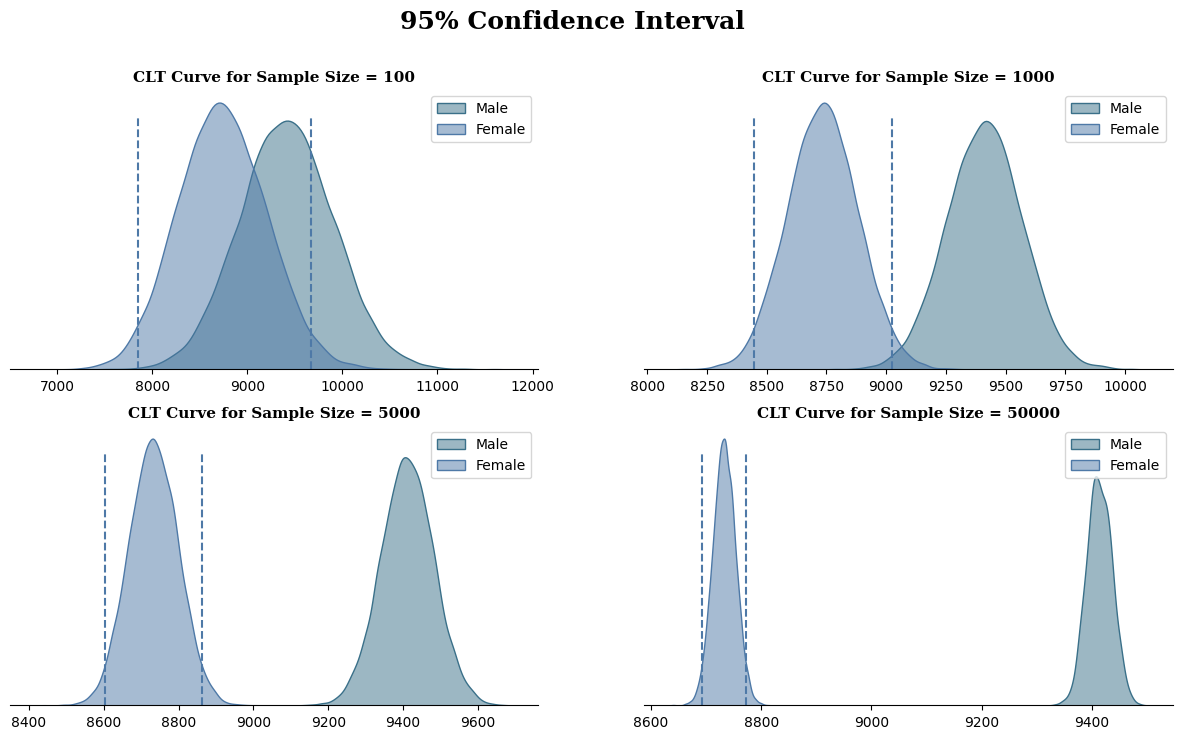

In [ ]:
m_samp_95,f_samp_95 = plot(95)

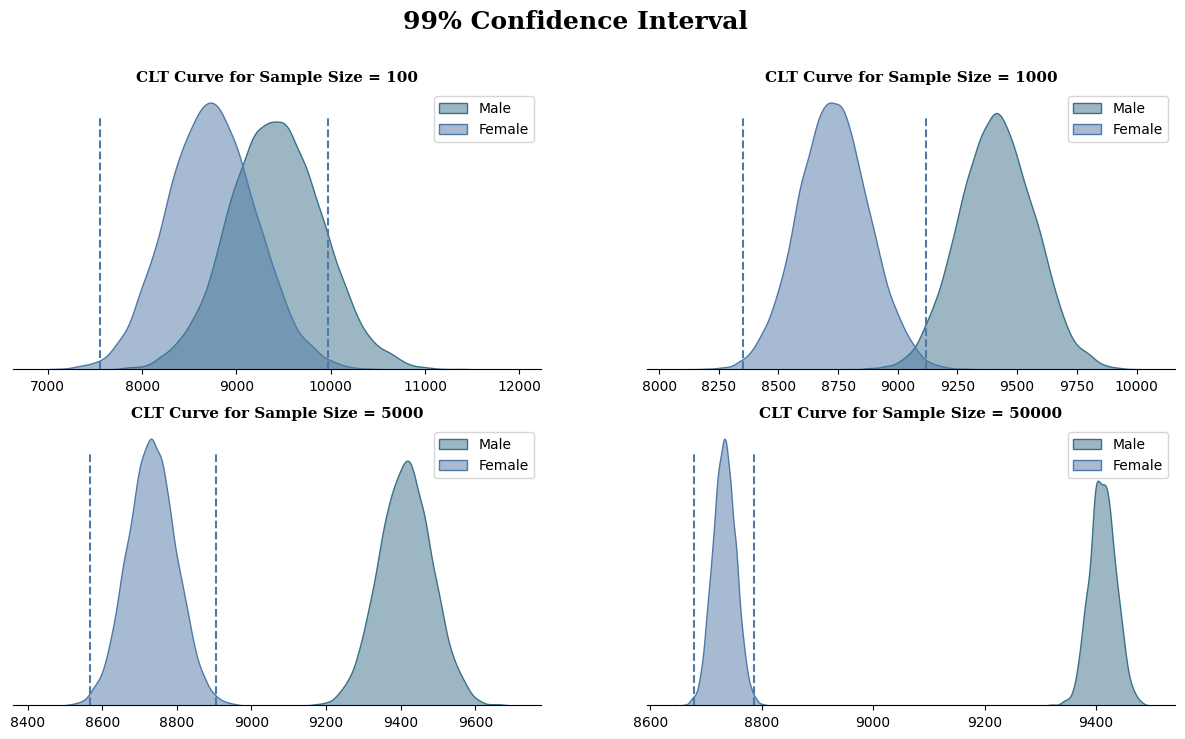

In [ ]:
m_samp_99,f_samp_99 = plot(99)

## **Are women spending more money per transaction than men? Why or Why not? (10 Points)**

Average Spending by Gender:
Gender
F    8732.438581
M    9411.924658
Name: Purchase, dtype: float64


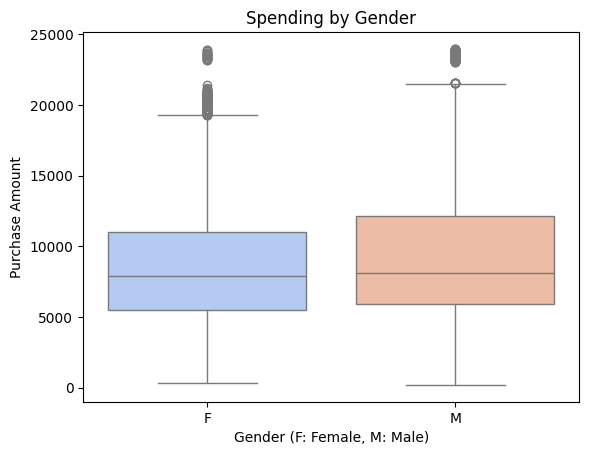

In [ ]:
# Grouping data by Gender and calculating average spending
gender_spending = df.groupby('Gender')['Purchase'].mean()
print("Average Spending by Gender:")
print(gender_spending)

# Visualizing spending by Gender
sns.boxplot(data=df, x='Gender', y='Purchase', palette="coolwarm")
plt.title("Spending by Gender")
plt.xlabel("Gender (F: Female, M: Male)")
plt.ylabel("Purchase Amount")
plt.show()


## **2. Confidence Intervals and Distribution of Expenses by Gender**

In [ ]:
import scipy.stats as stats

# Splitting data by Gender
male_spending = df[df['Gender'] == 'M']['Purchase']
female_spending = df[df['Gender'] == 'F']['Purchase']

# Calculating mean, standard error, and confidence intervals
for group, data in [('Male', male_spending), ('Female', female_spending)]:
    mean = data.mean()
    std_err = stats.sem(data)
    confidence_interval = stats.t.interval(0.95, len(data)-1, loc=mean, scale=std_err)
    print(f"{group} Spending:")
    print(f"Mean: {mean}, 95% CI: {confidence_interval}\n")


Male Spending:
Mean: 9411.924658265698, 95% CI: (nan, nan)

Female Spending:
Mean: 8732.438581163726, 95% CI: (8612.076358906908, 8852.800803420543)



## **3. Overlapping Confidence Intervals**

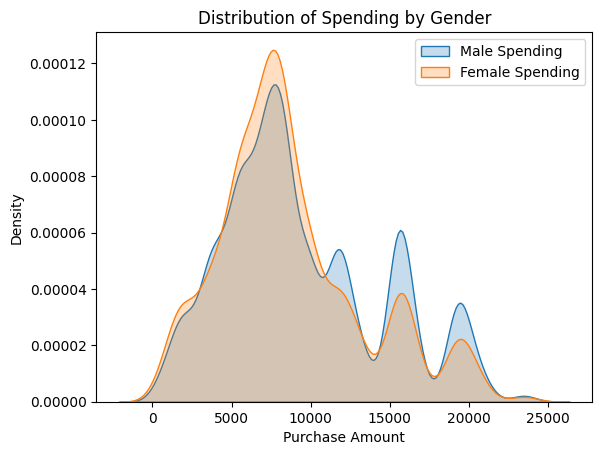

In [ ]:
# Visualizing distribution with KDE
sns.kdeplot(male_spending, label="Male Spending", shade=True)
sns.kdeplot(female_spending, label="Female Spending", shade=True)
plt.title("Distribution of Spending by Gender")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.legend()
plt.show()


## **4. Married vs. Unmarried Analysis**

In [ ]:
# Grouping by Marital Status
marital_spending = df.groupby('Marital_Status')['Purchase'].mean()
print("Average Spending by Marital Status:")
print(marital_spending)

# Confidence intervals for Marital Status
for status, data in [('Unmarried', df[df['Marital_Status'] == 0]['Purchase']),
                     ('Married', df[df['Marital_Status'] == 1]['Purchase'])]:
    mean = data.mean()
    std_err = stats.sem(data)
    confidence_interval = stats.t.interval(0.95, len(data)-1, loc=mean, scale=std_err)
    print(f"{status} Spending:")
    print(f"Mean: {mean}, 95% CI: {confidence_interval}\n")



Average Spending by Marital Status:
Marital_Status
Unmarried    9219.007587
Married      9303.357536
Name: Purchase, dtype: float64
Unmarried Spending:
Mean: nan, 95% CI: (nan, nan)

Married Spending:
Mean: nan, 95% CI: (nan, nan)



## **5. Age-Based Analysis**

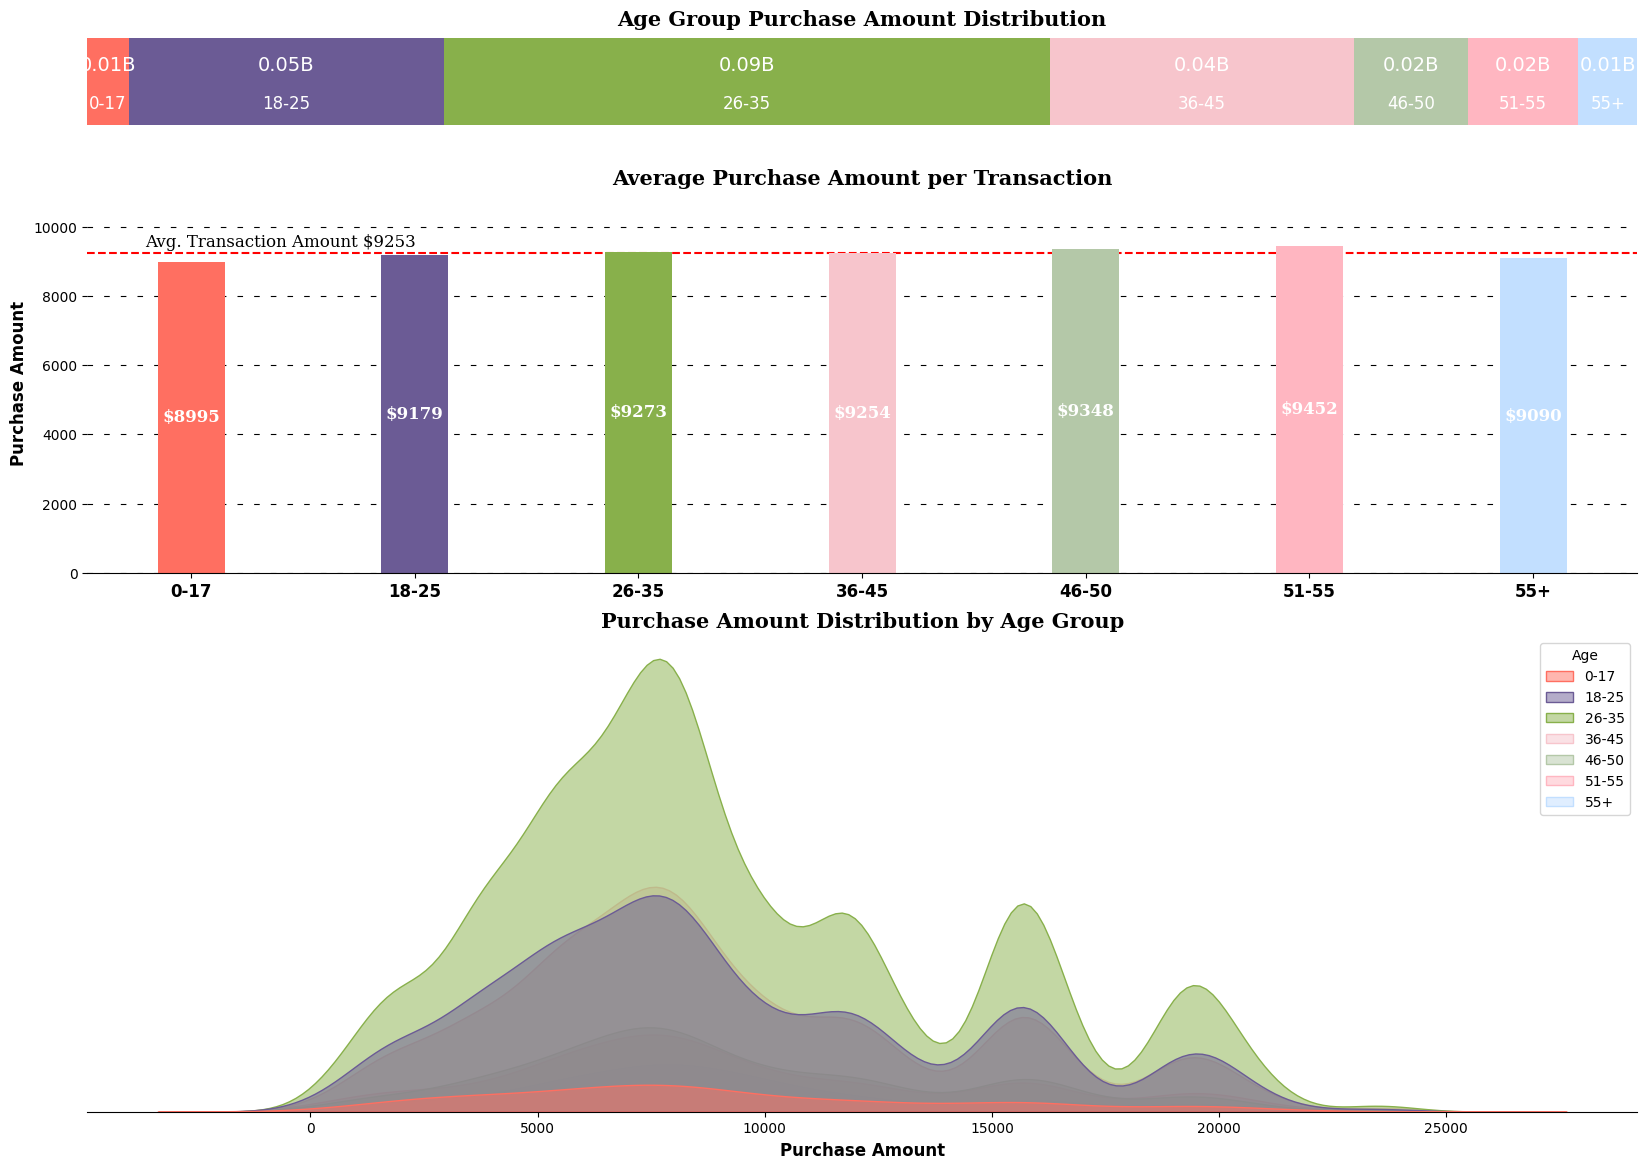

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Updated color map for better aesthetics
color_map = ["#FF6F61", "#6B5B95", "#88B04B", "#F7C5CC", "#B4C8A8", "#FFB6C1", "#C2DFFF"]

# Creating df for Purchase Amount vs Age Group
temp = df.groupby('Age')['Purchase'].agg(['sum','count']).reset_index()

# Calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9, 2)

# Calculating percentage distribution of purchase amount
temp['%sum'] = round(temp['sum'] / temp['sum'].sum(), 3)

# Calculating per purchase amount
temp['per_purchase'] = round(temp['sum'] / temp['count'])

# Setting the plot style
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 1, height_ratios=[0.10, 0.4, 0.5])

# Distribution of Purchase Amount
ax = fig.add_subplot(gs[0])

# Plotting the visual
left = 0
for i in temp.index:
    ax.barh(temp.loc[0, 'Age'], width=temp.loc[i, '%sum'], left=left, color=color_map[i], label=temp.loc[i, 'Age'])
    left += temp.loc[i, '%sum']

# Inserting the text
txt = 0.0  # for left parameter in ax.text()
for i in temp.index:
    # For amount
    ax.text(temp.loc[i, '%sum'] / 2 + txt, 0.15, f"{temp.loc[i, 'sum_in_billions']}B",
            va='center', ha='center', fontsize=14, color='white')

    # For age group
    ax.text(temp.loc[i, '%sum'] / 2 + txt, -0.20, f"{temp.loc[i, 'Age']}",
            va='center', ha='center', fontsize=12, color='white')

    txt += temp.loc[i, '%sum']

# Removing the axis lines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, 1)

# Plot title
ax.set_title('Age Group Purchase Amount Distribution', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Distribution of Purchase Amount per Transaction
ax1 = fig.add_subplot(gs[1])

# Plotting the visual
ax1.bar(temp['Age'], temp['per_purchase'], color=color_map, zorder=2, width=0.3)

# Adding average transaction line
avg = round(df['Purchase'].mean())

ax1.axhline(y=avg, color='red', zorder=0, linestyle='--')

# Adding text for the line
ax1.text(0.4, avg + 300, f"Avg. Transaction Amount ${avg:.0f}",
         {'font': 'serif', 'size': 12}, ha='center', va='center')

# Adjusting the y-limits
ax1.set_ylim(0, 11000)

# Adding the value counts
for i in temp.index:
    ax1.text(temp.loc[i, 'Age'], temp.loc[i, 'per_purchase'] / 2, f"${temp.loc[i, 'per_purchase']:.0f}",
             {'font': 'serif', 'size': 12, 'color': 'white', 'weight': 'bold'}, ha='center', va='center')

# Adding grid lines
ax1.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

# Removing the axis lines
for s in ['top', 'left', 'right']:
    ax1.spines[s].set_visible(False)

# Adding axis label
ax1.set_ylabel('Purchase Amount', fontweight='bold', fontsize=12)
ax1.set_xticklabels(temp['Age'], fontweight='bold', fontsize=12)

# Setting title for the visual
ax1.set_title('Average Purchase Amount per Transaction', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Creating kdeplot for Purchase Amount Distribution
ax3 = fig.add_subplot(gs[2, :])

# Plotting the kdeplot
sns.kdeplot(data=df, x='Purchase', hue='Age', palette=color_map, fill=True, alpha=0.5,
            ax=ax3)

# Removing the axis lines
for s in ['top', 'left', 'right']:
    ax3.spines[s].set_visible(False)

# Adjusting axis labels
ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Purchase Amount', fontweight='bold', fontsize=12)

# Setting title for the visual
ax3.set_title('Purchase Amount Distribution by Age Group', {'font': 'serif', 'size': 15, 'weight': 'bold'})

plt.show()


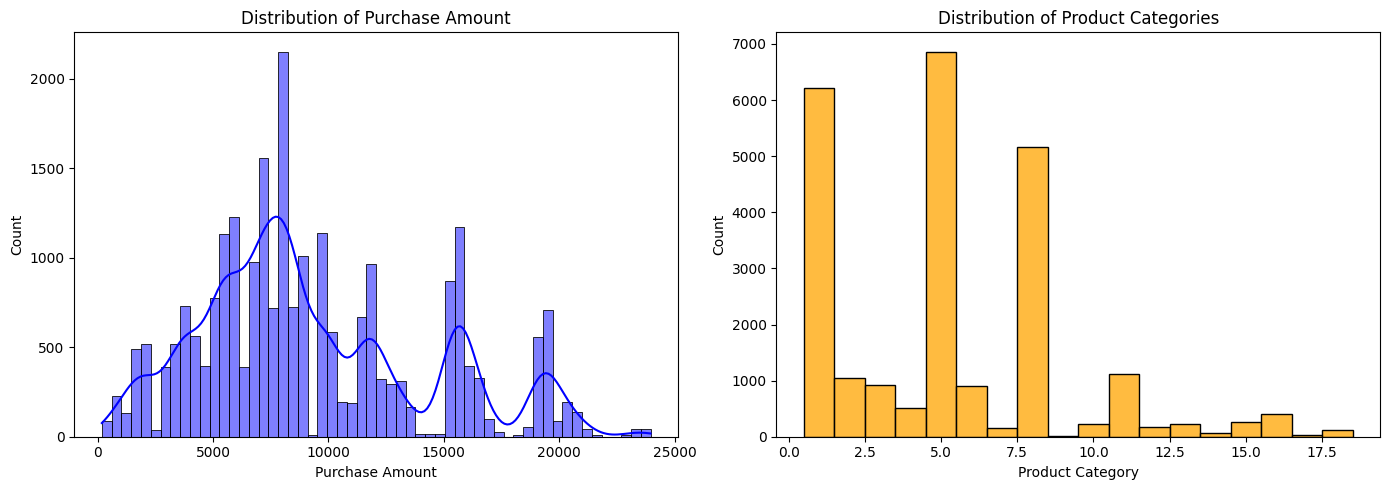

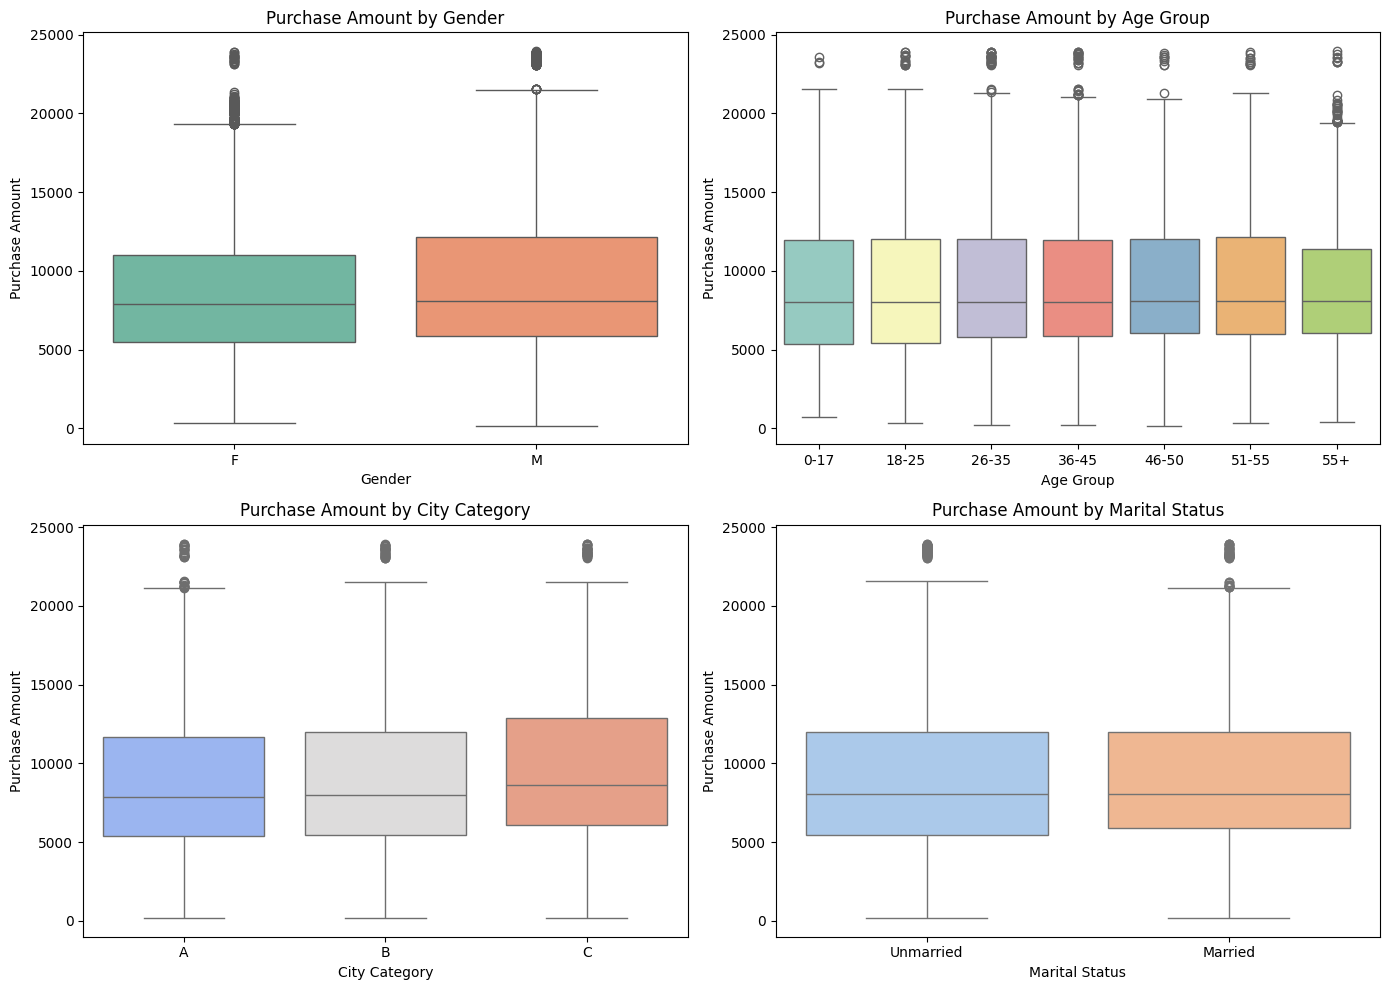

In [ ]:
numerical_summary = df.describe()

# Distribution of numerical variables
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Purchase distribution
sns.histplot(df['Purchase'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Purchase Amount')
axes[0].set_xlabel('Purchase Amount')

# Product category distribution
sns.histplot(df['Product_Category'], kde=False, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Product Categories')
axes[1].set_xlabel('Product Category')

plt.tight_layout()
plt.show()

# Bivariate analysis: relationships between key variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Purchase vs. Gender
sns.boxplot(data=df, x='Gender', y='Purchase', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Purchase Amount by Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Purchase Amount')

# Purchase vs. Age
sns.boxplot(data=df, x='Age', y='Purchase', ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title('Purchase Amount by Age Group')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Purchase Amount')

# Purchase vs. City_Category
sns.boxplot(data=df, x='City_Category', y='Purchase', ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Purchase Amount by City Category')
axes[1, 0].set_xlabel('City Category')
axes[1, 0].set_ylabel('Purchase Amount')

# Purchase vs. Marital_Status
sns.boxplot(data=df, x='Marital_Status', y='Purchase', ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Purchase Amount by Marital Status')
axes[1, 1].set_xlabel('Marital Status')
axes[1, 1].set_ylabel('Purchase Amount')

plt.tight_layout()
plt.show()

# **5.Final Insights (10 Points) - Illustrate the insights based on exploration and CLT**
*  Comments on the distribution of the variables and relationship between them
*  Comments for each univariate and bivariate plots.

*  Comments on different variables when generalizing it for Population

### 🔍 Insights

**1. Sample Size**
   - The analysis highlights the importance of sample size in estimating population parameters. It suggests that `as the sample size increases, the confidence intervals become narrower and more precise`. In business, this implies that larger sample sizes can provide more reliable insights and estimates.

**2. Confidence Intervals and customer spending patterns**
- From the above analysis, we can see that `the confidence interval overlap` for some of the age groups. We can club the average spending into following age groups -
    - 0 - 17 - Customers in this age group have the lowest spending per transaction
    - 18 - 25, 26 - 35, 46 - 50 -  Customers in these age groups have overlapping confidence intervals indicating similar buying characteristics
    - 36 - 45, 55+ - Customers in these age groups have overlapping confidence intervals indicating and similar spending patterns
    - 51 - 55 - Customers in this age group have the highest spending per transaction

**3. Population Average**
- We are `95% confident` that the true population average for following age groups falls between the below range -

    - 0 - 17 = \$ 8,888 to 8,979
    - 18 - 25 = \$ 9,125 to 9,213
    - 26 - 35 = \$ 9,209 to 9,297
    - 36 - 45 = \$ 9,288 to 9,376
    - 46 - 50 = \$ 9,165 to 9,253
    - 51 - 55 = \$ 9,490 to 9,579
    - 55+ = \$ 9,292 to 9,381


### **4. How can Walmart leverage this conclusion to make changes or improvements?**

**4.1. Targeted Marketing**
-  Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. Walmart can also tailor their product selection and marketing strategies to appeal to the preferences and needs of this age group

**4.2. Customer Segmentation**
-  Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.

**4.3 Premium Services**
- Recognizing that customers in the 51 - 55 age group have the highest spending per transaction, Walmart can explore opportunities to enhance the shopping experience for this demographic. This might involve offering premium services, personalized recommendations, or loyalty programs that cater to the preferences and spending habits of this age group.


# **6. Recommendations**

**1.Target Male Shoppers**
- Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.

**2. Focus on 26 - 45 Age Group**
-  With the age group between 26 and 45 contributing to the majority of sales, Walmart should specifically cater to the preferences and needs of this demographic.This could include offering exclusive deals on products that are popular among this age group.

**3. Engage Younger Shoppers**
- Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. It's essential to start building brand loyalty among younger consumers.

**4. Customer Segmentation**
- Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.

**5. Enhance the 51 - 55 Age Group Shopping Experience**
- Considering that customers aged 51 - 55 have the highest spending per transaction, Walmart offer them exclusive pre-sale access, special discount or provide personalized product recommendations for this age group. Walmart can also introduce loyalty programs specifically designed to reward and retain customers in the 51 - 55 age group.

**6. Post-Black Friday Engagement**
- After Black Friday, walmart should engage with customers who made purchases by sending follow-up emails or offers for related products. This can help increase customer retention and encourage repeat business throughout the holiday season and beyond.